Davies-Bouldin Index: 1.6317307062274242


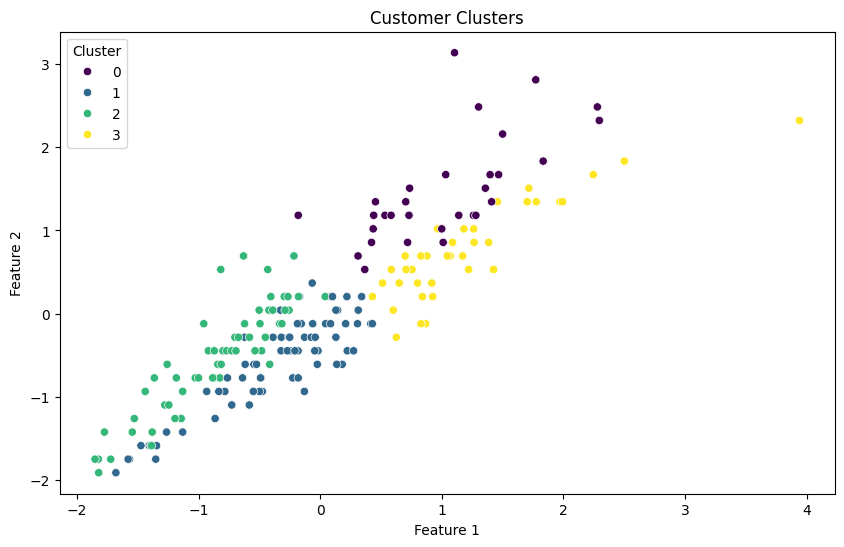

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

merged_data = pd.read_csv("C:/Users/sneha/OneDrive/Desktop/Zeotap-Data-Science-Assignment/merged.csv")
merged_data['AvgPrice'] = merged_data['TotalValue'] / merged_data['Quantity']
features = merged_data[['CustomerID', 'TotalValue', 'Quantity', 'AvgPrice', 'Region']]


customer_features = features.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'AvgPrice': 'mean',
    'Region': 'first'  
}).reset_index()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['TotalValue', 'Quantity', 'AvgPrice']),
    ('cat', OneHotEncoder(), ['Region'])
])


kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  
])


kmeans_pipeline.fit(customer_features)
customer_features['Cluster'] = kmeans_pipeline['kmeans'].labels_

processed_features = preprocessor.transform(customer_features)
db_index = davies_bouldin_score(processed_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=processed_features[:, 0], y=processed_features[:, 1],
    hue=customer_features['Cluster'], palette='viridis'
)
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()


customer_features.to_csv('C:/Users/sneha/OneDrive/Desktop/Zeotap-Data-Science-Assignment/clustering/Sneha_P_Pratap_Clustering.csv', index=False)
